In [60]:
import math
import pandas as pd
import torch
from   sklearn.model_selection import train_test_split
from   sklearn.compose import ColumnTransformer
from   sklearn.pipeline import Pipeline
from   sklearn.preprocessing import OneHotEncoder, StandardScaler
from   sklearn.linear_model import LogisticRegression
import shap

from src.DataLoader import CaltechBirdsDataset

/home/andrew/anaconda3/envs/torch/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
train_dict = pd.DataFrame()
dataset    = CaltechBirdsDataset(train=True)
birdloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)
for data, images in birdloader:
    data_pd = pd.DataFrame(data)
    train_dict = pd.concat((data_dict, data_pd))

test_dict = pd.DataFrame()
testset    = CaltechBirdsDataset(train=False)
birdloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=True)
for data, images in birdloader:
    data_pd = pd.DataFrame(data)
    test_dict = pd.concat((test_dict, data_pd))

data_dict = pd.concat([train_dict, test_dict])
   

In [7]:
data_dict = pd.concat([train_dict, test_dict])

In [29]:
data_dict
X, y = data_dict.iloc[:, 8:], data_dict.iloc[:, 3]
cats = list(data_dict)[8:]

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [56]:
preprocessor = ColumnTransformer(transformers=[('cat', OneHotEncoder(), cats)])
model = Pipeline([('preprocessor', preprocessor), ('classifier', LogisticRegression())])
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['has_bill_shape',
                                                   'has_wing_color',
                                                   'has_upperparts_color',
                                                   'has_underparts_color',
                                                   'has_breast_pattern',
                                                   'has_back_color',
                                                   'has_tail_shape',
                                                   'has_upper_tail_color',
                                                   'has_head_pattern',
                                                   'has_breast_color',
                                                   'has_throat_color',
                                                   'has_eye_color',
                                                   'has_bill_length',
                                                   'has_forehead_color',
                                                   'has_under_tail_color',
                                                   'has_nape_color',
                                                   'has_belly_color',
                                                   'has_wing_shape', 'has_size',
                                                   'has_shape',
                                                   'has_back_pattern',
                                                   'has_tail_pattern',
                                                   'has_belly_pattern',
                                                   'has_primary_color',
                                                   'has_leg_color',
                                                   'has_bill_color',
                                                   'has_crown_color',
                                                   'has_wing_pattern'])])),
                ('classifier', LogisticRegression())])

In [57]:
model.score(X_train, y_train)

0.8690400508582327

In [75]:
model.score(X_test, y_test)
y_pred = model.predict(X_test)

In [63]:
X_sub = shap.sample(X_train, 1000)

In [65]:
ex = shap.Explainer(model.predict_proba, X_sub)
shap_values = ex(X_test.iloc[0:100])

PermutationExplainer explainer: 101it [00:19,  2.93it/s]                         


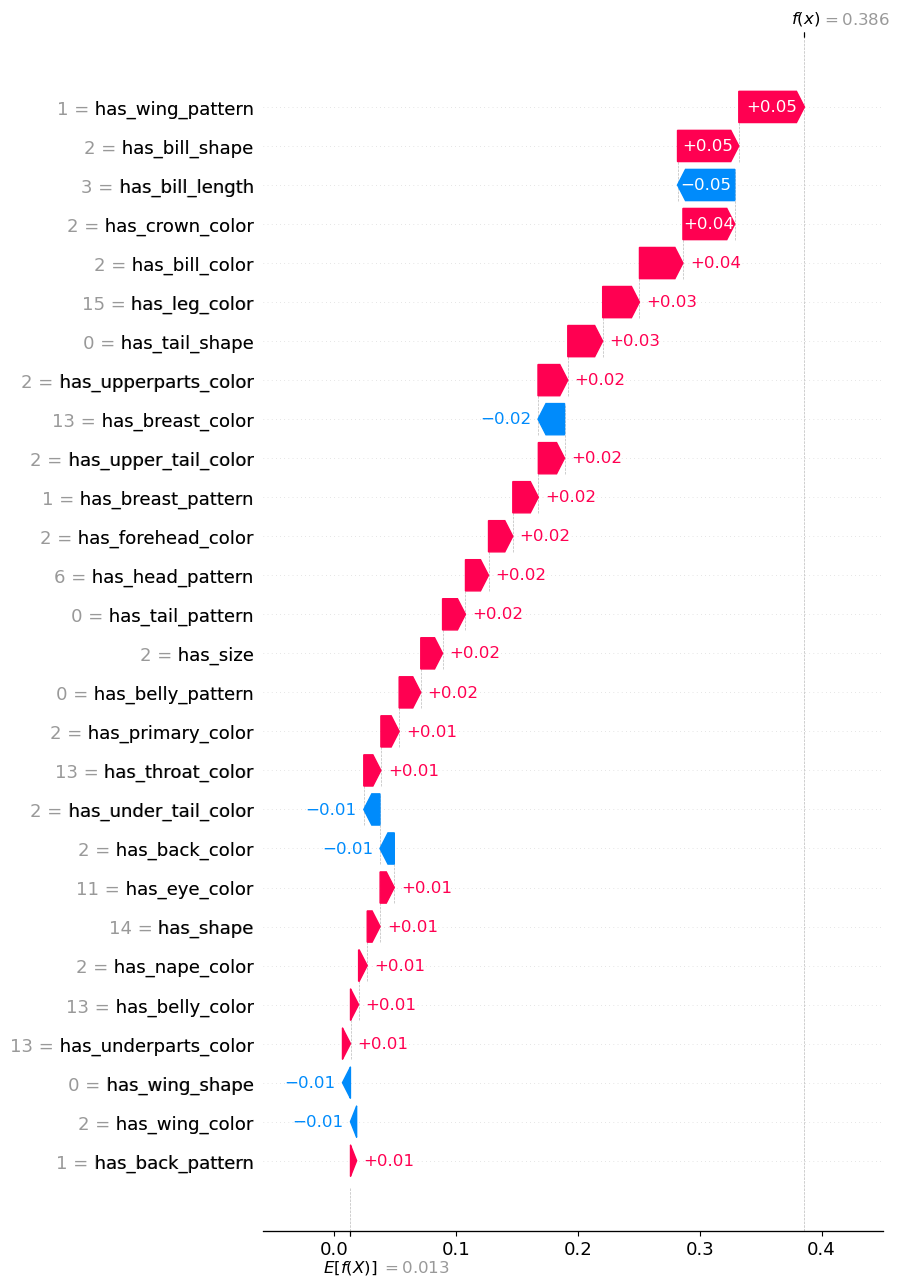

In [79]:
class_index, data_index = 177, 1
shap.plots.waterfall(shap_values[data_index, :, class_index], max_display=32)

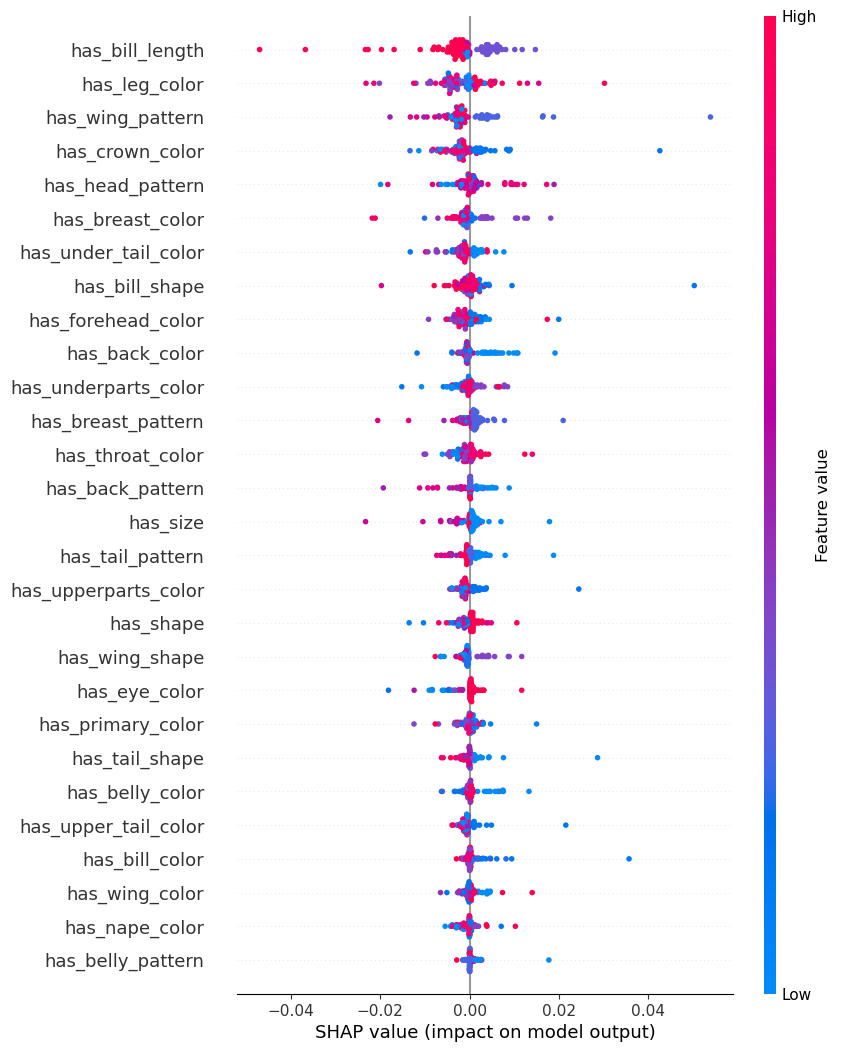

In [80]:
shap.plots.beeswarm(shap_values[:, :, class_index], max_display=32)

In [77]:
y_test.iloc[1]

np.int64(177)

In [78]:
y_pred[1]

np.int64(177)